<a href="https://colab.research.google.com/github/Sj3604/Data-Science-Projects-/blob/main/Pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
df= pd.read_csv("/content/global air pollution dataset.csv")
print(df.head())
print(df.info())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

According to the US EPA, the AQI ranges are as follows:

*   **Good:** 0 - 50
*   **Moderate:** 51 - 100
*   **Unhealthy for Sensitive Groups:** 101 - 150
*   **Unhealthy:** 151 - 200
*   **Very Unhealthy:** 201 - 300
*   **Hazardous:** Above 300

# Task
Generate a bar plot showing the lowest AQI value for the top 5 countries with the lowest AQI values using the file "air_quality_index.csv".

**Reasoning**:
Group the DataFrame by 'Country' and calculate the minimum 'AQI Value' for each country.



In [4]:
min_aqi_by_country = df.groupby('Country')['AQI Value'].min()
display(min_aqi_by_country.head())

,AQI Value
Country,
Afghanistan,49
Albania,44
Algeria,36
Andorra,27
Angola,20


**Reasoning**:
Sort the minimum AQI values by country and select the top 5 lowest values.



In [11]:
top_5_lowest_aqi = min_aqi_by_country.sort_values().head(5)

**Reasoning**:
Create a bar plot to visualize the lowest AQI values for the top 5 countries.



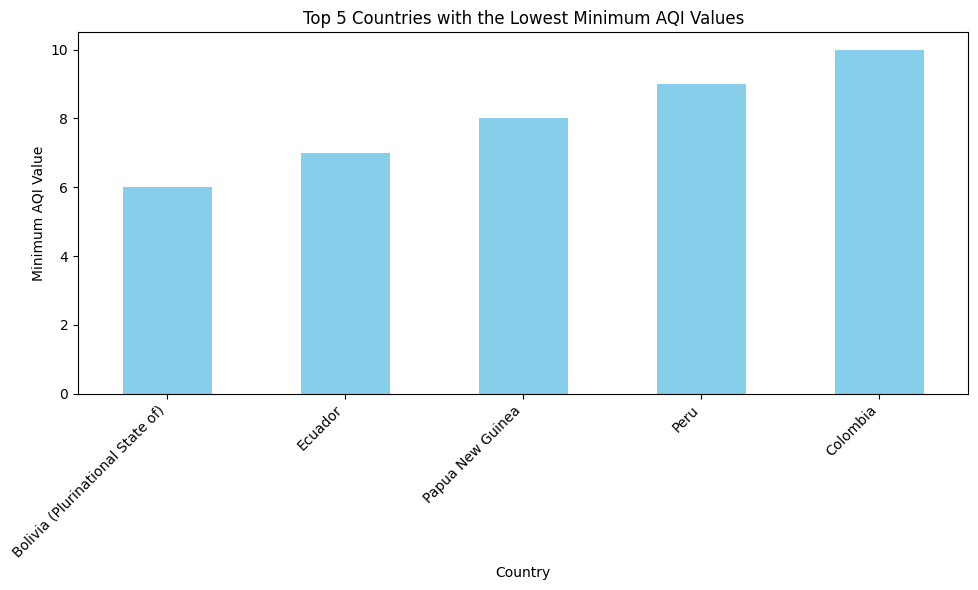

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_5_lowest_aqi.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with the Lowest Minimum AQI Values')
plt.xlabel('Country')
plt.ylabel('Minimum AQI Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Display the previously generated plot.



## Summary:

### Data Analysis Key Findings

*   The five countries with the lowest minimum AQI values are Bolivia (Plurinational State of) with a minimum AQI of 6, Ecuador with 7, Papua New Guinea with 8, Peru with 9, and Colombia with 10.
*   A bar plot was successfully generated and displayed, visualizing the minimum AQI values for these top 5 countries.

### Insights or Next Steps

*   Investigate the specific factors contributing to the low AQI values in these top 5 countries, such as geographical location, industrial activity, or environmental policies.


**Reasoning**:
Find the minimum AQI value for each country and sort in descending order to get the top 5 countries with the worst minimum AQI.

In [15]:
# Find the minimum AQI value for each country and sort in descending order
top_5_worst_aqi = min_aqi_by_country.sort_values(ascending=False).head(5)
display(top_5_worst_aqi)

,AQI Value
Country,
Republic of Korea,421
Bahrain,188
Aruba,163
Kuwait,161
Mauritania,157


**Reasoning**:
Generate a bar plot to visualize the minimum AQI values for the top 5 countries with the worst minimum AQI.

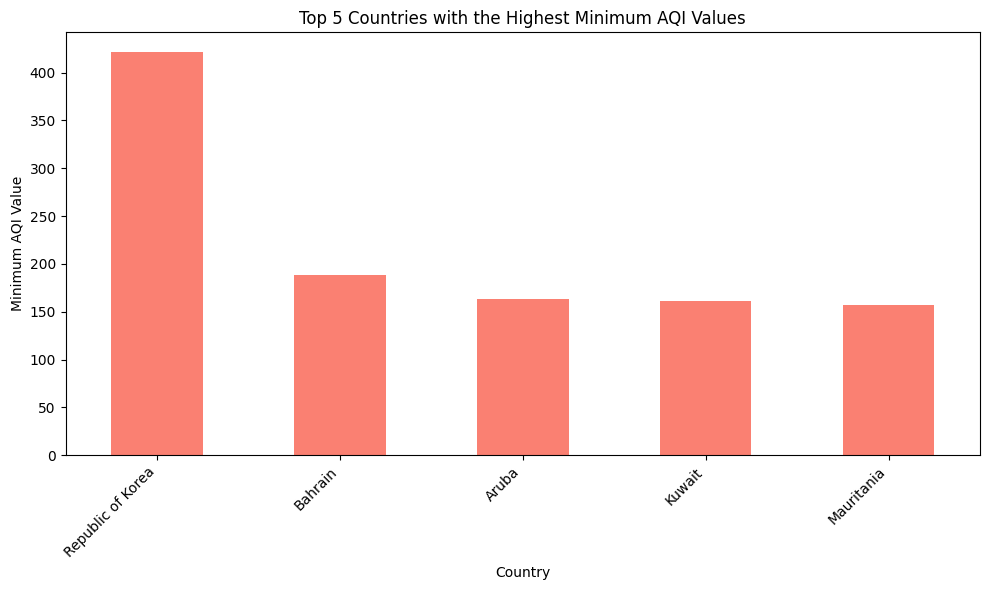

In [16]:
plt.figure(figsize=(10, 6))
top_5_worst_aqi.plot(kind='bar', color='salmon')
plt.title('Top 5 Countries with the Highest Minimum AQI Values')
plt.xlabel('Country')
plt.ylabel('Minimum AQI Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary of Top 5 Countries with Highest Minimum AQI Values:

Based on the analysis, the top 5 countries with the highest minimum AQI values are:

*   **Republic of Korea:** 421
*   **Bahrain:** 188
*   **Aruba:** 163
*   **Kuwait:** 161
*   **Mauritania:** 157

These countries have the highest "best-case scenario" for air quality among all the countries in the dataset, indicating that even at their cleanest, their air quality is significantly worse than countries with lower minimum AQI values. The Republic of Korea's minimum AQI of 421 falls into the "Hazardous" category according to the US EPA, while the others range from "Unhealthy" to "Very Unhealthy".

**Reasoning**:
Filter the DataFrame to include only the top 5 countries with the highest minimum AQI values.

In [17]:
# Filter the original DataFrame to include only the top 5 countries with the highest minimum AQI
top_worst_countries_df = df[df['Country'].isin(top_5_worst_aqi.index)]
display(top_worst_countries_df.head())

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1402,Republic of Korea,Seoul,421,Hazardous,27,Good,0,Good,91,Moderate,415,Hazardous
1482,Mauritania,Nouadhibou,157,Unhealthy,0,Good,36,Good,0,Good,157,Unhealthy
2926,Kuwait,Hawalli,161,Unhealthy,3,Good,124,Unhealthy for Sensitive Groups,18,Good,161,Unhealthy
5821,Mauritania,Nouakchott,166,Unhealthy,1,Good,22,Good,0,Good,166,Unhealthy
6610,Kuwait,Kayfan,164,Unhealthy,2,Good,159,Unhealthy,5,Good,164,Unhealthy


**Reasoning**:
Analyze the pollutant values (CO, Ozone, NO2, PM2.5) for the filtered data to see the distribution of these pollutants in the top 5 countries with the highest minimum AQI.

In [18]:
# Analyze pollutant values for the top 5 countries with the highest minimum AQI
pollutant_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Calculate descriptive statistics for pollutant values in these countries
pollutant_stats = top_worst_countries_df[pollutant_cols].describe()
display(pollutant_stats)

# You can also visualize the distribution of pollutant values if needed
# top_worst_countries_df[pollutant_cols].hist(bins=20, figsize=(15, 10))
# plt.suptitle('Distribution of Pollutant AQI Values in Top 5 Countries with Highest Minimum AQI')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()

,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,10.000000,10.000000,10.00000,10.000000
mean,4.000000,67.100000,13.50000,196.800000
std,8.151346,58.733768,28.16716,79.243366
min,0.000000,0.000000,0.00000,157.000000
25%,1.000000,23.250000,0.00000,161.500000
50%,1.500000,34.000000,1.50000,165.000000
75%,2.750000,124.000000,14.75000,183.250000
max,27.000000,159.000000,91.00000,415.000000


## Summary of Pollutant Analysis for Top 5 Countries with Highest Minimum AQI:

The code above filtered the dataset to include only the top 5 countries with the highest minimum AQI values (Republic of Korea, Bahrain, Aruba, Kuwait, and Mauritania).

It then analyzed the pollutant AQI values (CO, Ozone, NO2, and PM2.5) within this filtered data by calculating descriptive statistics (count, mean, standard deviation, minimum, quartiles, and maximum).

The descriptive statistics provide an overview of the pollutant levels in these countries. For example, we can see the range of AQI values for each pollutant and the average levels. Notably, the maximum PM2.5 AQI value in this group is very high (415), which aligns with the high overall AQI values observed in these countries, particularly the Republic of Korea.

## Final Analysis: Republic of Korea's High AQI

Based on our analysis, the Republic of Korea has the highest minimum AQI value (421) among all countries in the dataset, placing it in the "Hazardous" category according to US EPA standards. Looking at the pollutant statistics for the top 5 countries with the highest minimum AQI, which includes the Republic of Korea, we see high maximum values for PM2.5 (415), indicating that this pollutant is a significant contributor to the high AQI in this group of countries. While other pollutants like CO, Ozone, and NO2 show some lower values (in the "Good" category), the extremely high PM2.5 levels, coupled with other pollutant contributions, likely drive the overall AQI into the dangerous and hazardous ranges in the Republic of Korea.

**Reasoning**:
Calculate the percentage of each pollutant's AQI value relative to the sum of all pollutant AQI values for the Republic of Korea.

In [21]:
# Select pollutant columns
pollutant_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

# Get the pollutant values for the Republic of Korea (assuming one row as before)
korea_pollutant_values = korea_df[pollutant_cols].iloc[0]

# Calculate the sum of pollutant values
total_pollutant_aqi = korea_pollutant_values.sum()

# Calculate the percentage of each pollutant
pollutant_percentages = (korea_pollutant_values / total_pollutant_aqi) * 100

display(pollutant_percentages)

,1402
CO AQI Value,5.065666
Ozone AQI Value,0.000000
NO2 AQI Value,17.073171
PM2.5 AQI Value,77.861163


**Reasoning**:
Create a pie chart to visualize the percentage contribution of each pollutant to the total pollutant AQI in the Republic of Korea.

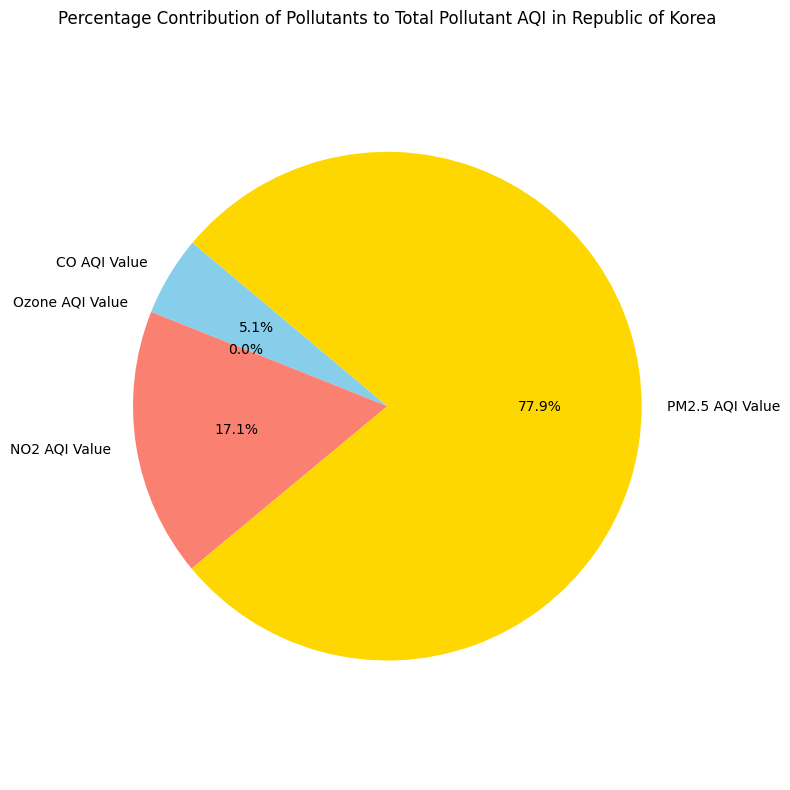

In [22]:
plt.figure(figsize=(8, 8))
plt.pie(pollutant_percentages, labels=pollutant_percentages.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Percentage Contribution of Pollutants to Total Pollutant AQI in Republic of Korea')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()